# Lesson 1: Image classification

You can click the blue arrow buttons on the left and right panes to hide them and make more room for the video. You can search the transcript using the text box at the bottom. Scroll down this page for links to many useful resources. If you have any other suggestions for links, edits, or anything else, you'll find an "edit" link at the bottom of this (and every) notes panel.

## Overview

To follow along with the lessons, you'll need to connect to a cloud GPU provider which has the fastai library installed (recommended; it should take only 5 minutes or so, and cost under $0.50/hour), or set up a computer with a suitable GPU yourself (which can take days to get working if you're not familiar with the process, so we don't recommend it). You'll also need to be familiar with the basics of the *Jupyter Notebook* environment we use for running deep learning experiments. Up to date tutorials and recommendations for these are available from the [course website](https://course.fast.ai).

The key outcome of this lesson is that we'll have trained an image classifier which can recognize pet breeds at state of the art accuracy. The key to this success is the use of *transfer learning*, which will be a key platform for much of this course. We'll also see how to analyze the model to understand its failure modes. In this case, we'll see that the places where the model is making mistakes is in the same areas that even breeding experts can make mistakes.

We'll discuss the overall approach of the course, which is somewhat unusual in being *top-down* rather than *bottom-up*. So rather than starting with theory, and only getting to practical applications later, instead we start with practical applications, and then gradually dig deeper and deeper in to them, learning the theory as needed. This approach takes more work for teachers to develop, but it's been shown to help students a lot, for example in [education research at Harvard](https://www.gse.harvard.edu/news/uk/09/01/education-bat-seven-principles-educators) by David Perkins.

We also discuss how to set the most important *hyper-parameter* when training neural networks: the *learning rate*, using Leslie Smith's fantastic *learning rate finder* method. Finally, we'll look at the important but rarely discussed topic of *labeling*, and learn about some of the features that fastai provides for allowing you to easily add labels to your images.

If you want to more deeply understand how PyTorch really works, you may want to check out [this official PyTorch tutorial](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy&mdash;although we'd only suggest doing that once you've completed a few lessons.

## Links

### Lesson resources

- [Course site](https://course.fast.ai), including setup guides for each platform
- [Course repo](https://github.com/fastai/course-v3)
- [fastai docs](http://docs.fast.ai)
- [fastai datasets](https://course.fast.ai/datasets)
- Notebooks:
  - [00_notebook_tutorial.ipynb](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/00_notebook_tutorial.ipynb)
  - [lesson1-pets.ipynb](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson1-pets.ipynb)
- [Detailed lesson notes](https://github.com/hiromis/notes/blob/master/Lesson1.md) - thanks to @hiromi
- [Lesson notes](https://forums.fast.ai/t/deep-learning-lesson-1-notes/27748) - thanks to @PoonamV (wiki thread - please help contribute!)
- [Lesson discussion thread](https://forums.fast.ai/t/lesson-1-discussion/27332)

### Other resources

- [Thread on creating your own image dataset](https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688)
- [What you need to do deep learning](http://www.fast.ai/2017/11/16/what-you-need/) (fast.ai blog post including some basics on what GPUs are and why they're needed)
- [Original Paper for Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)
- [The Oxford-IIIT Pet Dataset ](http://www.robots.ox.ac.uk/~vgg/data/pets/)
- [What the Regular Expressions in the notebook meant](https://medium.com/@youknowjamest/parsing-file-names-using-regular-expressions-3e85d64deb69)
- [Understanding Regular Expressions](https://youtu.be/DRR9fOXkfRE) (12 minute video)
- [Visualize Regular Expressions](https://regexr.com/)
- [Interactive tutorial to learn Regular Expressions](https://regexone.com)
- [Beginners Tutorial of Regular Expression](https://www.analyticsvidhya.com/blog/2015/06/regular-expression-python/)
- [One-Cycle Policy Fitting paper](https://arxiv.org/abs/1803.09820)
- [Visualizing and Understanding Convolutional Networks (paper)](https://arxiv.org/abs/1311.2901)
- [Splunk and Tensorflow for Security] (https://www.splunk.com/blog/2017/04/18/deep-learning-with-splunk-and-tensorflow-for-security-catching-the-fraudster-in-neural-networks-with-behavioral-biometrics.html)
- [Learning Rate Finder Paper](https://arxiv.org/pdf/1506.01186.pdf)

### How to scrape images

- [Official course tutorial](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb)
- https://forums.fast.ai/t/tips-for-building-large-image-datasets/26688
- https://forums.fast.ai/t/generating-image-datasets-quickly/19079
- https://forums.fast.ai/t/how-to-scrape-the-web-for-images/7446/8

## Suggested Practice

Create a model that can correctly classify images. Use lesson2-download.ipynb ([available here in the course repo](https://github.com/fastai/course-v3/tree/master/nbs/dl1)) as a means of guidance. Remember, the more you practice the better you will get!

---

## Edit this page

To edit this page, [click here](https://github.com/fastai/course-v3/edit/master/files/dl-2019/notes/notes-1-1.md). This will take you to a edit window at GitHub where you can submit your suggested changes. They will automatically be turned in to a [pull request](https://help.github.com/articles/about-pull-requests/) which will be reviewed by an admin prior to publication.



In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
# from fastai.metrics import error_rate

In [5]:
bs = 64

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
help(URLs)

Help on class URLs in module fastai.datasets:

class URLs(builtins.object)
 |  Global constants for dataset and model URLs.
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  ADULT_SAMPLE = 'http://files.fast.ai/data/examples/adult_sample'
 |  
 |  AG_NEWS = 'https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv'
 |  
 |  AMAZON_REVIEWS = 'https://s3.amazonaws.com/fast-ai-nlp/amazon_review_f...
 |  
 |  AMAZON_REVIEWS_POLARITY = 'https://s3.amazonaws.com/fast-ai-nlp/amazon...
 |  
 |  BIWI_HEAD_POSE = 'https://s3.amazonaws.com/fast-ai-imagelocal/biwi_hea...
 |  
 |  BIWI_SAMPLE = 'http://files.fast.ai/data/examples/biwi_sample'
 |  
 |  CALTECH_101 = 'https://s3.amazonaws.com/fast-ai-imageclas/caltech_101'
 |  
 |  CAMVI

In [12]:
path = untar_data(URLs.PETS)
path

PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet')

In [14]:
help(path)

Help on PosixPath in module pathlib object:

class PosixPath(Path, PurePosixPath)
 |  Path subclass for non-Windows systems.
 |  
 |  On a POSIX system, instantiating a Path should return this object.
 |  
 |  Method resolution order:
 |      PosixPath
 |      Path
 |      PurePosixPath
 |      PurePath
 |      builtins.object
 |  
 |  Methods inherited from Path:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, t, v, tb)
 |  
 |  absolute(self)
 |      Return an absolute version of this path.  This function works
 |      even if the path doesn't point to anything.
 |      
 |      No normalization is done, i.e. all '.' and '..' will be kept along.
 |      Use resolve() to get the canonical path to a file.
 |  
 |  chmod(self, mode)
 |      Change the permissions of the path, like os.chmod().
 |  
 |  exists(self)
 |      Whether this path exists.
 |  
 |  expanduser(self)
 |      Return a new path with expanded ~ and ~user constructs
 |      (as returned by os.path.expanduser)
 |  
 |

In [13]:
path.ls()

[PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/annotations')]

In [15]:
path_anno = path/'annotations'
path_img = path/'images'

In [16]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c:Union[pathlib.Path, str], check_ext:bool=True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [20]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_46.jpg'),
 PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/images/leonberger_57.jpg'),
 PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/images/german_shorthaired_35.jpg'),
 PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/images/german_shorthaired_147.jpg'),
 PosixPath('/home/zhangruochi/.fastai/data/oxford-iiit-pet/images/leonberger_75.jpg')]

In [21]:
help(ImageDataBunch)

Help on class ImageDataBunch in module fastai.vision.data:

class ImageDataBunch(fastai.basic_data.DataBunch)
 |  DataBunch suitable for computer vision.
 |  
 |  Method resolution order:
 |      ImageDataBunch
 |      fastai.basic_data.DataBunch
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  batch_stats(self, funcs:Collection[Callable]=None, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>) -> torch.Tensor
 |      Grab a batch of data and call reduction function `func` per channel
 |  
 |  normalize(self, stats:Collection[torch.Tensor]=None, do_x:bool=True, do_y:bool=False) -> None
 |      Add normalize transform using `stats` (defaults to `DataBunch.batch_stats`)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  create_from_ll(lls:fastai.data_block.LabelLists, bs:int=64, val_bs:int=None, ds_tfms:Union[Callable, Collection[Callable], NoneType]=None, num_workers:int=6, dl_tfms:Union[Coll

In [32]:
doc(ImageDataBunch.from_name_re)

In [25]:
pat = r'/([^/]+)_\d+.jpg$'
# https://medium.com/@jamestjw/parsing-file-names-using-regular-expressions-3e85d64deb69?

In [28]:
import re
string = 'data/oxford-iiit-pet/images/american_bulldog_146.jpg'
pat = r'([^/]+)_\d+.jpg$'
pat = re.compile(pat)
print(pat.search(string).group(1))

american_bulldog


In [41]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat = pat,ds_tfms = get_transforms(),size = 224 ).normalize()

In [42]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



In [55]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows:int=5, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>, reverse:bool=False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



In [70]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leonberger,german_shorthaired,german_shorthaired,leonberger,samoyed
Path: /home/zhangruochi/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
english_setter,english_setter,leonberger,saint_bernard,leonberger
Path: /home/zhangruochi/.fastai/data/oxford-iiit-pet/images;

Test: None

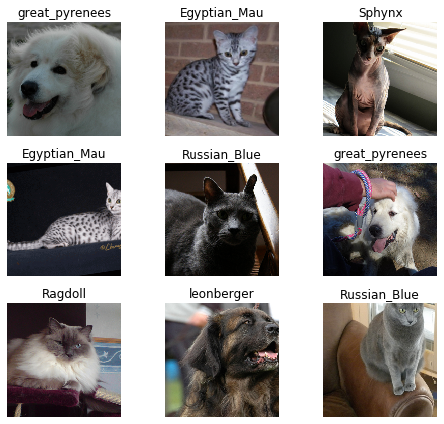

In [51]:
data.show_batch(rows=3, figsize=(7,6))

In [62]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [63]:
len(data.classes),data.c

(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

### Trainer for model using data to minimize loss_func with optimizer opt_func

In [73]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/zhangruochi/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 135699312.68it/s]


In [77]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [78]:
learn.fit_one_cycle(4)

epoch     train_loss  valid_loss  error_rate  time    
0         0.863478    0.300622    0.089310    01:59     
1         0.416955    0.289185    0.092016    01:44     
2         0.265178    0.225282    0.067659    01:44     
3         0.171008    0.202759    0.063599    01:44     


In [79]:
learn.save('stage-1')

## Result

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [81]:
help(ClassificationInterpretation)

Help on class ClassificationInterpretation in module fastai.train:

class ClassificationInterpretation(Interpretation)
 |  Interpretation methods for classification models.
 |  
 |  Method resolution order:
 |      ClassificationInterpretation
 |      Interpretation
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  GradCAM = _cl_int_gradcam(self, idx, ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>, heatmap_thresh:int=16, image:bool=True)
 |  
 |  __init__(self, learn:fastai.basic_train.Learner, preds:torch.Tensor, y_true:torch.Tensor, losses:torch.Tensor, ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  confusion_matrix(self, slice_size:int=1)
 |      Confusion matrix as an `np.ndarray`.
 |  
 |  most_confused(self, min_val:int=1, slice_size:int=1) -> Collection[Tuple[str, str, int]]
 |      Sorted descending list of largest non-diagonal entries of confusion matrix, 

In [82]:
interp = ClassificationInterpretation.from_learner(learn)

In [84]:
losses,idxs = interp.top_losses()

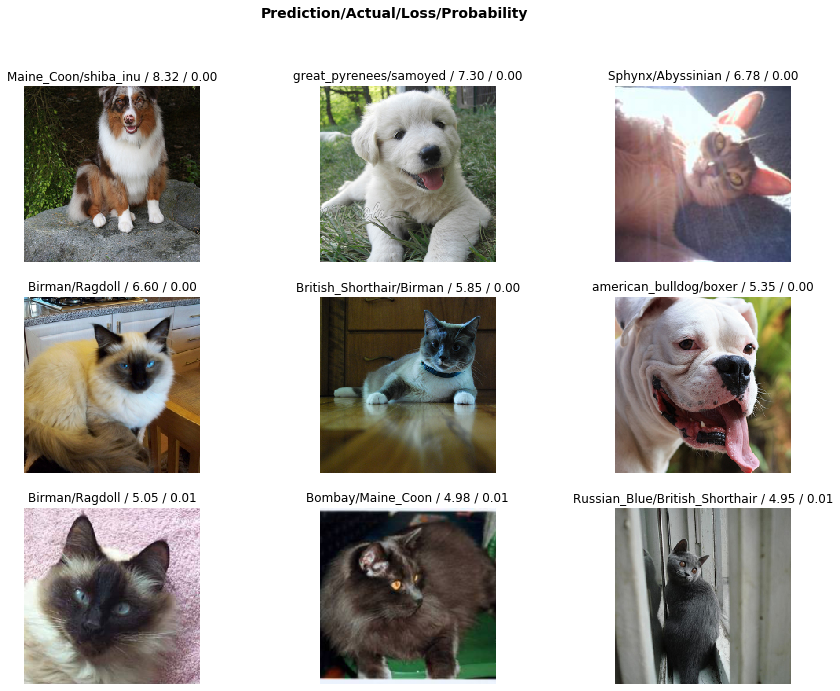

In [85]:
interp.plot_top_losses(9, figsize=(15,11))

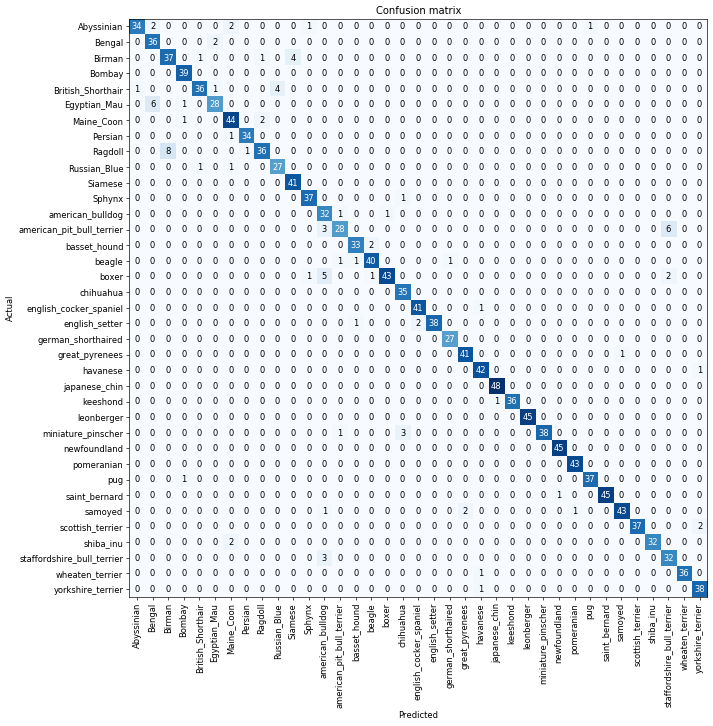

In [86]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [87]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('Egyptian_Mau', 'Bengal', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('boxer', 'american_bulldog', 5),
 ('Birman', 'Siamese', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Abyssinian', 'Maine_Coon', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('scottish_terrier', 'yorkshire_terrier', 2),
 ('shiba_inu', 'Maine_Coon', 2)]

## Unfreezing, fine-tuning, and learning rates
Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [89]:
learn.unfreeze()

In [90]:
learn.fit_one_cycle(1)

epoch     train_loss  valid_loss  error_rate  time    
0         0.567692    0.298874    0.100135    02:20     


In [92]:
learn.load('stage-1');

In [93]:
learn.lr_find()

epoch     train_loss  valid_loss  error_rate  time    
0         0.410584    #na#        01:19       
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


/data/anaconda/envs/fastai/lib/python3.6/site-packages/fastai/sixel.py:16: UserWarning: You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel
  warn("You could see this plot with `libsixel`. See https://github.com/saitoha/libsixel")


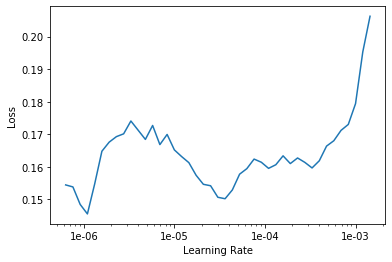

In [94]:
learn.recorder.plot()

In [99]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch     train_loss  valid_loss  error_rate  time    
0         0.161624    0.202193    0.065629    02:16     
1         0.134731    0.181716    0.058187    02:17     
